# Spark Dataframes and Spark SQL

In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
sc = pyspark.SparkContext()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/01/02 21:59:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


First we want to creates a SQL context object named 'sqlCtx'. this class can read data from a wide range of sources.

+ This includes file formats such as: .JSON, .CSV/TSV, .XML, Parquet, Amazon S3
+ Database systems such as: MySQL, PostgreSQL
+ Big data systems such as: Hive, Avro, Hbase

In [3]:
sqlCtx = pyspark.SQLContext(sc)

/usr/local/opt/apache-spark/libexec/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [8]:
df = sqlCtx.read.json("census_2010.json")
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.printSchema()

root
 |-- age: long (nullable = true)
 |-- females: long (nullable = true)
 |-- males: long (nullable = true)
 |-- total: long (nullable = true)
 |-- year: long (nullable = true)



In [29]:
(df.count(),len(df.columns))

(101, 5)

In [5]:
df.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



Unlike pandas dataframes, spark dataframes require us to input the number of rows we want displayed in the .head() method, otherwise, default row 0.

In [20]:
first_five = df.head(5)
for element in first_five:
    print(element)

Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)
Row(age=1, females=1997991, males=2087350, total=4085341, year=2010)
Row(age=2, females=2000746, males=2088549, total=4089295, year=2010)
Row(age=3, females=2002756, males=2089465, total=4092221, year=2010)
Row(age=4, females=2004366, males=2090436, total=4094802, year=2010)


In [21]:
first_one = df.head(5)[0]
first_one

Row(age=0, females=1994141, males=2085528, total=4079669, year=2010)

In [22]:
df.select('age', 'males', 'females', 'year').show()

+---+-------+-------+----+
|age|  males|females|year|
+---+-------+-------+----+
|  0|2085528|1994141|2010|
|  1|2087350|1997991|2010|
|  2|2088549|2000746|2010|
|  3|2089465|2002756|2010|
|  4|2090436|2004366|2010|
|  5|2091803|2005925|2010|
|  6|2093905|2007781|2010|
|  7|2097080|2010281|2010|
|  8|2101670|2013771|2010|
|  9|2108014|2018603|2010|
| 10|2114217|2023289|2010|
| 11|2118390|2026352|2010|
| 12|2132030|2037286|2010|
| 13|2159943|2060100|2010|
| 14|2195773|2089651|2010|
| 15|2229339|2117689|2010|
| 16|2263862|2146942|2010|
| 17|2285295|2165852|2010|
| 18|2285990|2168175|2010|
| 19|2272689|2159571|2010|
+---+-------+-------+----+
only showing top 20 rows



In [23]:
five_plus = df[df['age'] > 5]
five_plus.show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
| 20|2151448|2259690|4411138|2010|
| 21|2140926|2244039|4384965|2010|
| 22|2133510|2229168|4362678|2010|
| 23|2132897|2218195|4351092|2010|
| 24|2135789|2208905|4344694|2010|
| 25|2136497|2197148|4333645|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



In [24]:
df[df['females'] < df['males']].show()

+---+-------+-------+-------+----+
|age|females|  males|  total|year|
+---+-------+-------+-------+----+
|  0|1994141|2085528|4079669|2010|
|  1|1997991|2087350|4085341|2010|
|  2|2000746|2088549|4089295|2010|
|  3|2002756|2089465|4092221|2010|
|  4|2004366|2090436|4094802|2010|
|  5|2005925|2091803|4097728|2010|
|  6|2007781|2093905|4101686|2010|
|  7|2010281|2097080|4107361|2010|
|  8|2013771|2101670|4115441|2010|
|  9|2018603|2108014|4126617|2010|
| 10|2023289|2114217|4137506|2010|
| 11|2026352|2118390|4144742|2010|
| 12|2037286|2132030|4169316|2010|
| 13|2060100|2159943|4220043|2010|
| 14|2089651|2195773|4285424|2010|
| 15|2117689|2229339|4347028|2010|
| 16|2146942|2263862|4410804|2010|
| 17|2165852|2285295|4451147|2010|
| 18|2168175|2285990|4454165|2010|
| 19|2159571|2272689|4432260|2010|
+---+-------+-------+-------+----+
only showing top 20 rows



#### The .toPandas() method

The idea is to harness speed of Spark when analyzing big data and extract only the data we are interested in.
Then we can convert it into a pandas dataframe for heavier data analysis.

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<AxesSubplot:>

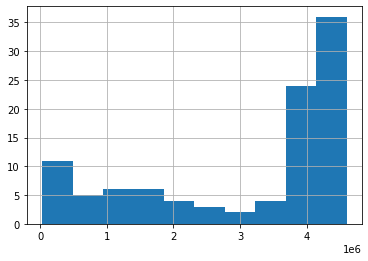

In [30]:
pandas_df = df.toPandas()
pandas_df['total'].hist()

In [31]:
pandas_df.head()

,age,females,males,total,year
0,0,1994141,2085528,4079669,2010
1,1,1997991,2087350,4085341,2010
2,2,2000746,2088549,4089295,2010
3,3,2002756,2089465,4092221,2010
4,4,2004366,2090436,4094802,2010


#### Using SQL queries with Spark

SQL is extremely useful when joining multiple tables. Spark SQL allows us to combine data from various files and store the information in one table.

In [33]:
df.registerTempTable('census2010') # Register a temp table with given name
tables = sqlCtx.tableNames()
tables

/usr/local/opt/apache-spark/libexec/python/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


['census2010']

In [34]:
q1 = "SELECT age FROM census2010;"

sqlCtx.sql(q1).show()

+---+
|age|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
| 10|
| 11|
| 12|
| 13|
| 14|
| 15|
| 16|
| 17|
| 18|
| 19|
+---+
only showing top 20 rows



In [37]:
q2 = "SELECT males, females FROM census2010 WHERE age > 5 AND age < 15;"

sqlCtx.sql(q2).show()

+-------+-------+
|  males|females|
+-------+-------+
|2093905|2007781|
|2097080|2010281|
|2101670|2013771|
|2108014|2018603|
|2114217|2023289|
|2118390|2026352|
|2132030|2037286|
|2159943|2060100|
|2195773|2089651|
+-------+-------+



In [36]:
q3 = "SELECT males, females FROM census2010;"

sqlCtx.sql(q3).describe().show() # describe() shows basic statistics

+-------+------------------+-----------------+
|summary|             males|          females|
+-------+------------------+-----------------+
|  count|               101|              101|
|   mean|1520095.3168316833|1571460.287128713|
| stddev|  818587.208016823|748671.0493484351|
|    min|              4612|            25673|
|    max|           2285990|          2331572|
+-------+------------------+-----------------+



#### Combining files with Spark SQL

This is where we see the power of Spark SQL. The ability to use joins to analyze multiple tables from various files at a high speed.

In [38]:
#Load files into the sqlCtx object
df = sqlCtx.read.json("census_2010.json")
df2 = sqlCtx.read.json("census_1980.json")
df3 = sqlCtx.read.json("census_1990.json")
df4 = sqlCtx.read.json("census_2000.json")

df.registerTempTable('census2010')
df2.registerTempTable('census1980')
df3.registerTempTable('census1990')
df4.registerTempTable('census2000')

tables = sqlCtx.tableNames()
tables

['census1980', 'census1990', 'census2000', 'census2010']

In [39]:
q4 = 'SELECT c1.total, c2.total FROM census2010 c1 INNER JOIN census2000 c2 ON c1.age = c2.age;'

sqlCtx.sql(q4).show()

+-------+-------+
|  total|  total|
+-------+-------+
|4079669|3733034|
|4085341|3825896|
|4089295|3904845|
|4092221|3970865|
|4094802|4024943|
|4097728|4068061|
|4101686|4101204|
|4107361|4125360|
|4115441|4141510|
|4126617|4150640|
|4137506|4152174|
|4144742|4145530|
|4169316|4139512|
|4220043|4138230|
|4285424|4137982|
|4347028|4133932|
|4410804|4130632|
|4451147|4111244|
|4454165|4068058|
|4432260|4011192|
+-------+-------+
only showing top 20 rows



In [40]:
q5 = '''
SELECT 
    SUM(c1.total) 2010_total, 
    SUM(c2.total) 2000_total,
    SUM(c3.total) 1990_total
FROM census2010 c1 
INNER JOIN census2000 c2 ON c1.age = c2.age
INNER JOIN census1990 c3 ON c1.age = c3.age
'''

sqlCtx.sql(q5).show()

+----------+----------+----------+
|2010_total|2000_total|1990_total|
+----------+----------+----------+
| 312247116| 284594395| 254506647|
+----------+----------+----------+

